# Data analysis: Vaccinations
In the file `vaccinations.csv` you find vaccination data for various countries. It is up to you to clean and analyse this data. Use the provided code fields under the tasks to write down your code. 

## Attention
- Use the provided code fields to write down the expected code of the questions above.
- Do not split your code for that task into various fields.
- Leave the comments (#) untouched and do not remove them.
- Use the correct names for the variables, as mentioned.

----------------------

Import the necessary packages.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

* Import the vaccinations dataset into a DataFrame named `df_vaccinations`. 
* Inspect the DataFrame by showing the first 10 rows (do not use slicing for this).


In [48]:
#Import and inspect
df_vaccinations = pd.read_csv('vaccinations.csv')
df_vaccinations.head(10)

,Unnamed: 0.1,Unnamed: 0,date,total_vaccinations_Wales,people_vaccinated_Wales,people_fully_vaccinated_Wales,daily_vaccinations_Wales,total_vaccinations_Canada,people_vaccinated_Canada,people_fully_vaccinated_Canada,...,people_fully_vaccinated_Belgium,daily_vaccinations_Belgium,total_vaccinations_Lithuania,people_vaccinated_Lithuania,people_fully_vaccinated_Lithuania,daily_vaccinations_Lithuania,total_vaccinations_Scotland,people_vaccinated_Scotland,people_fully_vaccinated_Scotland,daily_vaccinations_Scotland
0,0,0,2021-01-10,86118.0,86039.0,79.0,NaN,323497.0,319545.0,3952.0,...,203.0,3947.0,23607.0,23607.0,NaN,1979.0,166135.0,163377.0,2758.0,NaN
1,1,1,2021-01-11,91336.0,91239.0,97.0,5218.0,361841.0,357878.0,3963.0,...,223.0,4758.0,25825.0,25825.0,NaN,2296.0,178799.0,175942.0,2857.0,12664.0
2,2,2,2021-01-12,101479.0,101371.0,108.0,7680.0,393052.0,387536.0,5516.0,...,255.0,6803.0,27930.0,27930.0,NaN,2507.0,194955.0,191965.0,2990.0,14410.0
3,3,3,2021-01-13,113094.0,112973.0,121.0,8992.0,423365.0,410079.0,13286.0,...,393.0,9366.0,34140.0,34140.0,NaN,2893.0,211397.0,208207.0,3190.0,15087.0
4,4,4,2021-01-14,126504.0,126375.0,129.0,10096.0,466005.0,449649.0,16356.0,...,423.0,11518.0,42830.0,42830.0,NaN,3535.0,228171.0,224840.0,3331.0,15509.0
5,5,5,2021-01-15,126504.0,126375.0,129.0,8077.0,515478.0,496065.0,19413.0,...,452.0,13558.0,50212.0,50212.0,NaN,3844.0,245436.0,241924.0,3512.0,15860.0
6,6,6,2021-01-16,126504.0,126375.0,129.0,6731.0,553360.0,532763.0,20597.0,...,466.0,13837.0,51320.0,51320.0,NaN,3959.0,263797.0,260140.0,3657.0,16277.0
7,7,7,2021-01-17,151938.0,151737.0,201.0,9403.0,581955.0,560100.0,21855.0,...,492.0,14238.0,52460.0,51366.0,1094.0,4122.0,268689.0,264991.0,3698.0,14651.0
8,8,8,2021-01-18,162197.0,161932.0,265.0,10123.0,623250.0,600660.0,22590.0,...,654.0,15032.0,56996.0,54217.0,2779.0,4453.0,288468.0,284582.0,3886.0,15667.0
9,9,9,2021-01-19,176186.0,175816.0,370.0,10672.0,662635.0,637795.0,24840.0,...,899.0,15517.0,63269.0,56560.0,6709.0,5048.0,314079.0,309909.0,4170.0,17018.0


* Change the dates in the date column to pandas datetime objects.
* Only include the rows with data from 2021.


In [49]:
#datetime objects, year 2021
# Check for any data related to Lithuania across all years
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])
df_vaccinations_2021 = df_vaccinations[df_vaccinations['date'].dt.year == 2021]

* Remove the rows with NaN values.

In [50]:
#NaN
columns_of_interest = [
    'total_vaccinations_Lithuania', 'people_vaccinated_Lithuania', 
    'people_fully_vaccinated_Lithuania', 'daily_vaccinations_Lithuania',
    'total_vaccinations_Bulgaria', 'people_vaccinated_Bulgaria',
    'people_fully_vaccinated_Bulgaria', 'daily_vaccinations_Bulgaria',
    'total_vaccinations_Canada', 'people_vaccinated_Canada',
    'people_fully_vaccinated_Canada', 'daily_vaccinations_Canada',
    'total_vaccinations_Singapore', 'people_vaccinated_Singapore',
    'people_fully_vaccinated_Singapore', 'daily_vaccinations_Singapore'
]

# Drop rows only if all the relevant columns are NaN
df_vaccinations_2021 = df_vaccinations[df_vaccinations['date'].dt.year == 2021].dropna(subset=columns_of_interest, how='all')

* Create 4 different DataFrames, one for each of the following countries: Lithuania, Bulgaria, Canada and Singapore. Name them `df_Lithuania`, `df_Bulgaria`, `df_Canada` and `df_Singapore` respectively.
* Each dataframe should include the columns with the dates and the columns with the data of the corresponding country. 


In [51]:
#New dataframes
# Create separate DataFrames for Lithuania, Bulgaria, Canada, and Singapore
# Check the column names in the original DataFrame
# Check if there's any data for Lithuania
df_Lithuania = df_vaccinations_2021[['date',
                        'total_vaccinations_Lithuania',
                        'people_vaccinated_Lithuania',
                        'people_fully_vaccinated_Lithuania',
                        'daily_vaccinations_Lithuania']]
df_Bulgaria = df_vaccinations_2021[['date', 'total_vaccinations_Bulgaria', 'people_vaccinated_Bulgaria', 'people_fully_vaccinated_Bulgaria', 'daily_vaccinations_Bulgaria']]
df_Canada = df_vaccinations_2021[['date', 'total_vaccinations_Canada', 'people_vaccinated_Canada', 'people_fully_vaccinated_Canada', 'daily_vaccinations_Canada']]
df_Singapore = df_vaccinations_2021[['date', 'total_vaccinations_Singapore', 'people_vaccinated_Singapore', 'people_fully_vaccinated_Singapore', 'daily_vaccinations_Singapore']]
# Check the number of rows in each DataFrame after dropping NaNs



### Lithuania
Plot a figure displaying following information of vaccinations over time in Lithuania:
* The number of vaccinations is displayed on the y-axis
* Daily vaccinations in green
* People vaccinated in blue
* People fully vaccinated in red
* Display a legend with appropriate labels, indicating which data is shown
* Ensure proper axis labels and a title are included
* On the x-axis, ensure there are indications for every month, labeled with the abbreviation of the month in English (Jan, Feb, March etc.) 

Note: the y-axis will be in logarithmic scale due to the large numbers. You do not have to change this.

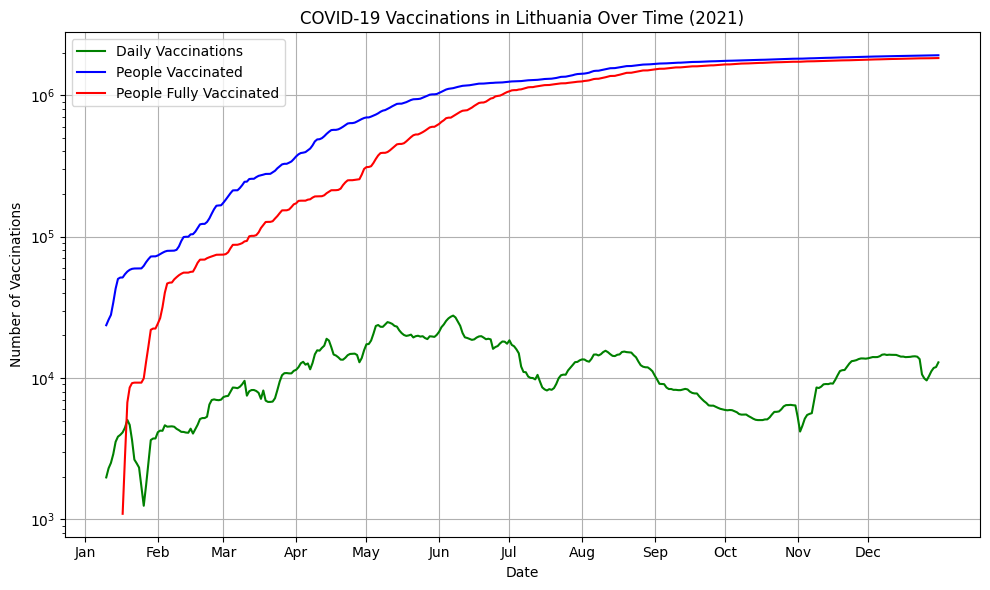

In [52]:
# Plotting Lithuania's vaccination data
plt.figure(figsize=(10, 6))

# Plotting daily vaccinations in green
plt.plot(df_Lithuania['date'], df_Lithuania['daily_vaccinations_Lithuania'], color='green', label='Daily Vaccinations')

# Plotting people vaccinated in blue
plt.plot(df_Lithuania['date'], df_Lithuania['people_vaccinated_Lithuania'], color='blue', label='People Vaccinated')

# Plotting people fully vaccinated in red
plt.plot(df_Lithuania['date'], df_Lithuania['people_fully_vaccinated_Lithuania'], color='red', label='People Fully Vaccinated')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Vaccinations')
plt.title('COVID-19 Vaccinations in Lithuania Over Time (2021)')

# Display a legend with appropriate labels
plt.legend()

# Adding a grid for better readability
plt.grid(True)

# Set month labels on the x-axis
plt.xticks(df_Lithuania['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp(), df_Lithuania['date'].dt.strftime('%b').drop_duplicates())

# Using a logarithmic scale for the y-axis
plt.yscale('log')

# Display the plot
plt.tight_layout()
plt.show()


### Daily vaccinations
Create a new graph and plot the daily vaccinations over time for the countries for which you created seperate dataframes. The number of people is displayed on the y-axis.
* Lithuania in orange
* Canada in red
* Singapore in green
* Bulgaria in blue
* Display a legend with appropriate labels so it is clear what data is shown
* Ensure proper axis labels and a title are included
* On the x-axis, ensure indications for every month, labeled with the abbreviation of the month in English (Jan, Feb, March etc.) 
* Show a grid 

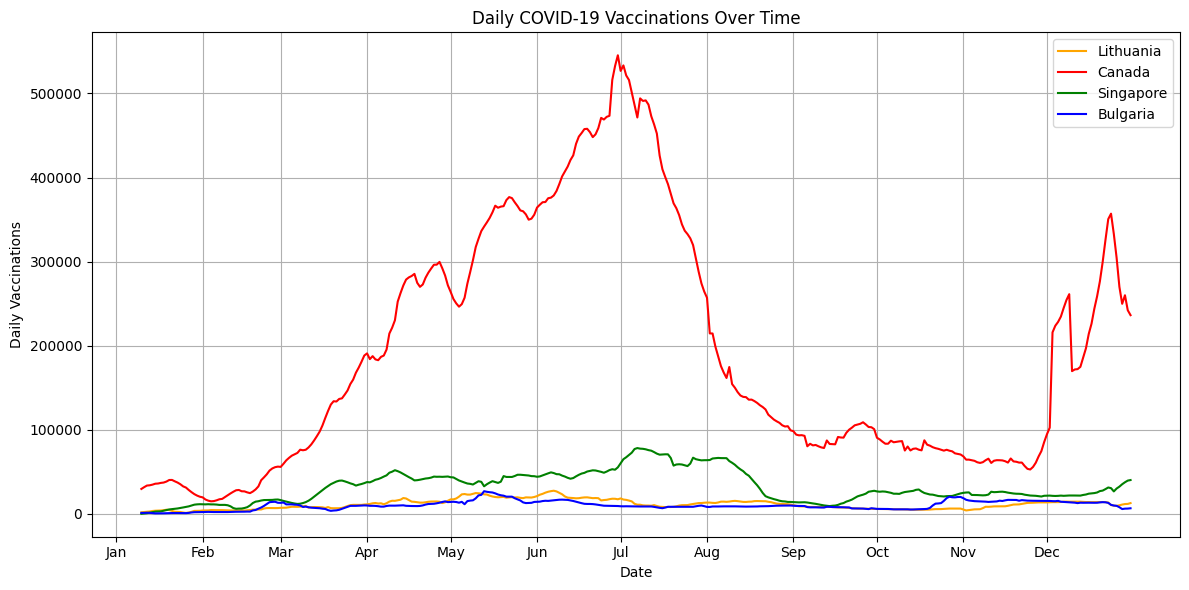

In [53]:

# Plotting daily vaccinations for all countries
plt.figure(figsize=(12, 6))

# Lithuania in orange
plt.plot(df_Lithuania['date'], df_Lithuania['daily_vaccinations_Lithuania'], color='orange', label='Lithuania')

# Canada in red
plt.plot(df_Canada['date'], df_Canada['daily_vaccinations_Canada'], color='red', label='Canada')

# Singapore in green
plt.plot(df_Singapore['date'], df_Singapore['daily_vaccinations_Singapore'], color='green', label='Singapore')

# Bulgaria in blue
plt.plot(df_Bulgaria['date'], df_Bulgaria['daily_vaccinations_Bulgaria'], color='blue', label='Bulgaria')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.title('Daily COVID-19 Vaccinations Over Time')

# Display a legend with appropriate labels
plt.legend()

# Adding a grid for better readability
plt.grid(True)

# Set month labels on the x-axis
plt.xticks(df_Lithuania['date'].dt.to_period('M').drop_duplicates().dt.to_timestamp(), df_Lithuania['date'].dt.strftime('%b').drop_duplicates())

# Display the plot
plt.tight_layout()
plt.show()

___


Check your work thouroughly and ensure you did all the tasks.  
There are no tests provided for this data analysis exercise. Ensure you used the right names. 

___
